# Inverse methods
For this exercise we will download a dataset of $O_3$ concentration from the TROPOMI instrument on board the Copernicus Sentinel-5p satellite. The dataset can be donloaded from the [Copernicus Dataspace](https://dataspace.copernicus.eu/). In order to download the dataset we have to select an areao of interest, the dates, and the product. From the menu we select: Sentinel-5p -> TROPOMI -> Level-2 O3. The tool can show us the available products. After the download we can use [Panoply](https://www.giss.nasa.gov/tools/panoply/) to have a look at the structure of the dataset.  

In [46]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.colors as mcol
from matplotlib.colors import ListedColormap
from zipfile import ZipFile
import netCDF4 as nc4

In [6]:
path = 'data/S5P_NRTI_L2_O3_20240818/'
filename = 'S5P_NRTI_L2_O3_20240818.nc'

The L2_O3 dataset is structured into two groups at the root level: PRODUCT and METADATA. The ozone total vertical column is in the PRODUCT group. The PRODUCT group contains a sub groups SUPPORT_DATA that itself contains three more sub groups: DETAILED_RESULTS, GEOLOCATIONS, and INPUT_DATA. The averaging kernel is in DETAILED_RESULTS

In [34]:
from netCDF4 import Dataset
fh = Dataset(path + filename, mode='r')
fh.groups

{'PRODUCT': <class 'netCDF4._netCDF4.Group'>
 group /PRODUCT:
     dimensions(sizes): scanline(357), ground_pixel(450), time(1), corner(4), layer(13), level(14)
     variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), int32 delta_time(time, scanline, ground_pixel), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 ozone_total_vertical_column(time, scanline, ground_pixel), float32 ozone_total_vertical_column_precision(time, scanline, ground_pixel), int32 layer(layer), int32 level(level)
     groups: SUPPORT_DATA,
 'METADATA': <class 'netCDF4._netCDF4.Group'>
 group /METADATA:
     dimensions(sizes): 
     variables(dimensions): 
     groups: EOP_METADATA, ISO_METADATA, QA_STATISTICS, GRANULE_DESCRIPTION, ESA_METADATA}

In [41]:
bb_north = 50.4687
bb_south = 42.0917
bb_west = -5.4580
bb_east = 7.4794
area_of_interest = [bb_north, bb_west, bb_south, bb_east]

## Ozone total vertical column

In [38]:
o3_product_ds = xr.open_dataset(path + filename, group='PRODUCT')
o3_product_ds

<xarray.Dataset>
Dimensions:                                (scanline: 357, ground_pixel: 450,
                                            time: 1, corner: 4, layer: 13,
                                            level: 14)
Coordinates:
  * scanline                               (scanline) float64 0.0 1.0 ... 356.0
  * ground_pixel                           (ground_pixel) float64 0.0 ... 449.0
  * time                                   (time) datetime64[ns] 2024-08-18
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * layer                                  (layer) int32 0 1 2 3 ... 9 10 11 12
  * level                                  (level) int32 0 1 2 3 ... 10 11 12 13
Data variables:
    latitude                               (time, scanline, ground_pixel) float32 ...
    longitude                              (time, scanline, ground_pixel) float32 ...
    delta_time                             (time, scanline, ground_pixel) datetime64[ns] ...
    time_utc                               (time, scanline) object ...
    qa_value                               (time, scanline, ground_pixel) float32 ...
    ozone_total_vertical_column            (time, scanline, ground_pixel) float32 ...
    ozone_total_vertical_column_precision  (time, scanline, ground_pixel) float32 ...

In [42]:
o3_total_column = o3_product_ds['ozone_total_vertical_column']
o3_total_column

<xarray.DataArray 'ozone_total_vertical_column' (time: 1, scanline: 357,
                                                 ground_pixel: 450)>
[160650 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 353.0 354.0 355.0 356.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2024-08-18
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             total ozone column
    multiplication_factor_to_convert_to_DU:                2241.15
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

In [55]:
o3_longitude = o3_product_ds['longitude']
o3_longitude

<xarray.DataArray 'longitude' (time: 1, scanline: 357, ground_pixel: 450)>
[160650 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 353.0 354.0 355.0 356.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2024-08-18
Attributes:
    long_name:      pixel center longitude
    units:          degrees_east
    standard_name:  longitude
    valid_min:      -180.0
    valid_max:      180.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/longitude_bounds

In [56]:
o3_latitude = o3_product_ds['latitude']
o3_latitude

<xarray.DataArray 'latitude' (time: 1, scanline: 357, ground_pixel: 450)>
[160650 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 3.0 ... 353.0 354.0 355.0 356.0
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2024-08-18
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds

In [48]:
def create_figure(): 
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black')
    ax.coastlines()
    ax.set_extent([bb_west, bb_east, bb_south, bb_north], ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    return fig, ax

Text(0.5, 1.0, 'O3 total vertical column - 2024-08-18')

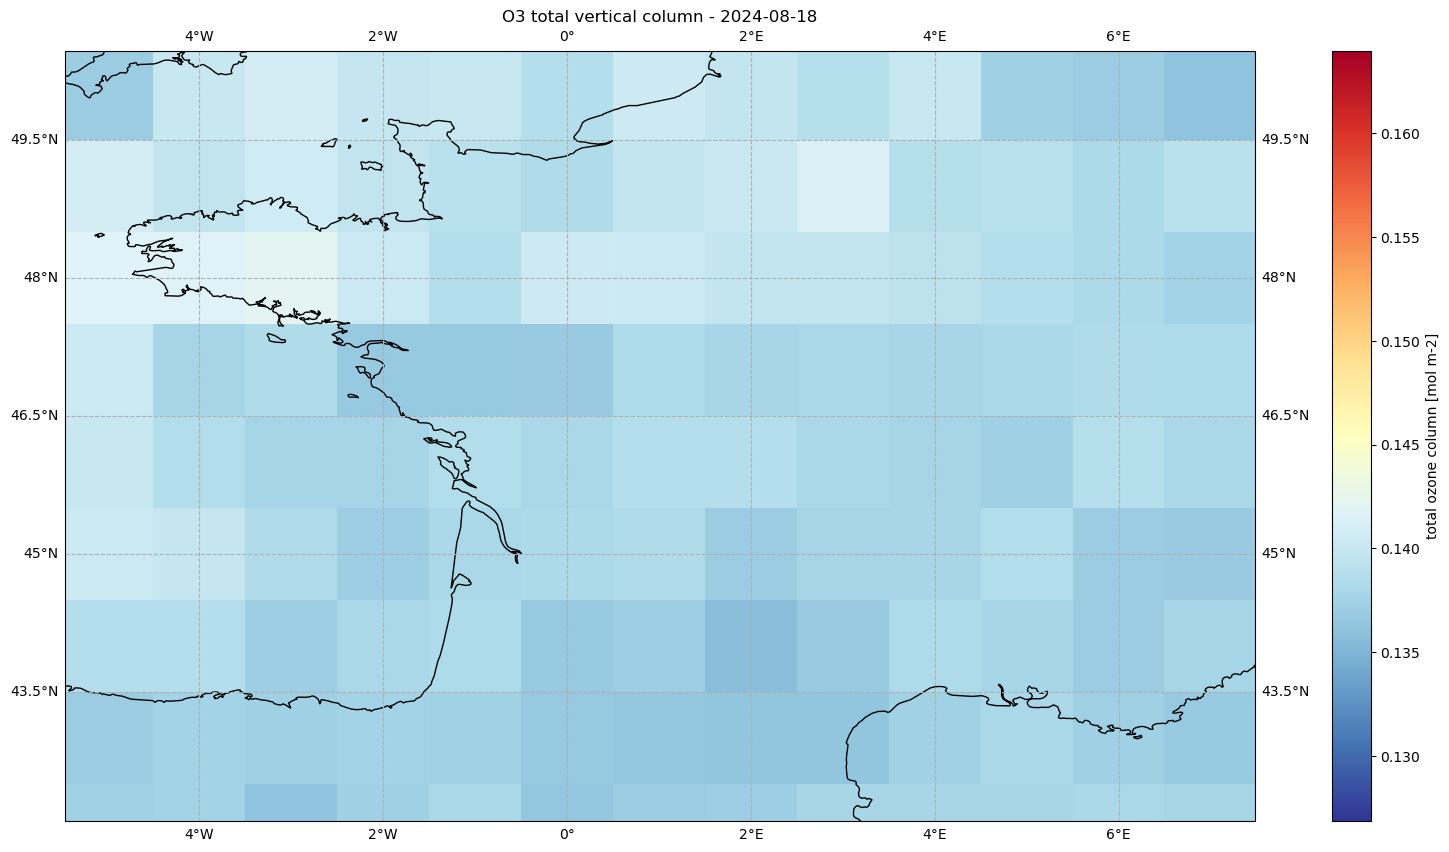

In [57]:
_, ax = create_figure()
o3_total_column_observations = o3_total_column.sel(time='2024-08-18')
o3_total_column_observations.plot.pcolormesh(ax=ax, x=None, y=None, add_colorbar=True, cmap='RdYlBu_r')
plt.title('O3 total vertical column - 2024-08-18')

## Averaging kernel

In [37]:
o3_support_ds = xr.open_dataset(path + filename, group='PRODUCT/SUPPORT_DATA/DETAILED_RESULTS')
o3_support_ds

<xarray.Dataset>
Dimensions:                                 (time: 1, scanline: 357,
                                             ground_pixel: 450, layer: 13,
                                             level: 14,
                                             number_of_slant_columns: 4,
                                             number_of_doas_polynomial_coefficients: 4)
Coordinates:
  * number_of_slant_columns                 (number_of_slant_columns) int32 0...
  * number_of_doas_polynomial_coefficients  (number_of_doas_polynomial_coefficients) int32 ...
Dimensions without coordinates: time, scanline, ground_pixel, layer, level
Data variables: (12/25)
    ozone_profile_apriori                   (time, scanline, ground_pixel, layer) float32 ...
    averaging_kernel                        (time, scanline, ground_pixel, layer) float32 ...
    pressure_grid                           (time, scanline, ground_pixel, level) float32 ...
    fitted_slant_columns                    (time, scanline, ground_pixel, number_of_slant_columns) float64 ...
    fitted_slant_columns_precision          (time, scanline, ground_pixel, number_of_slant_columns) float32 ...
    number_of_iterations_slant_column       (time, scanline, ground_pixel) float32 ...
    ...                                      ...
    number_of_iterations_vertical_column    (time, scanline, ground_pixel) float32 ...
    effective_scene_albedo                  (time, scanline, ground_pixel) float32 ...
    effective_scene_albedo_precision        (time, scanline, ground_pixel) float32 ...
    doas_polynomial_coefficients            (time, scanline, ground_pixel, number_of_doas_polynomial_coefficients) float32 ...
    euv                                     (time, scanline, ground_pixel) float32 ...
    processing_quality_flags                (time, scanline, ground_pixel) float64 ...